In [1]:
import networkx as nx;
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt

In [2]:
import IGtools as igt

In [3]:
from mis_utils import *

## Computation from theory  and simulations

In [4]:
# define the colormap
cmap = plt.cm.hot
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# Size dependence

## fixed average degree

In [11]:
iterations = 15;
real_s = {}
pred_s = {}
mis_s = {}
z = 10
ns = range(15,60,10)
for n in ns:
    now = time.time()
    real_s[n] = {}
    pred_s[n] = {}
    mis_s[n] = np.max([len(nx.maximal_independent_set(nx.erdos_renyi_graph(n,z/float(n)))) for i in range(10)]);
    print('starting mis loop')
    for i in list(range(1,mis_s[n])):
        print('gamma = ', i)
        real_s[n][i] = []
        pred_s[n][i] = []
        for num_it in range(iterations):
            g = nx.erdos_renyi_graph(n,z/float(n))
            k1  = np.mean(list(dict(g.degree()).values()))
            k2  = np.mean(np.array(list(dict(g.degree()).values()))**2)
            M = 2 * g.number_of_edges()
            real_s[n][i].append(np.mean(average_beta_sim_count(g,i,15000)))
            pred_s[n][i].append(average_beta_gamma(i, M, k1,k2))
    print(n, time.time() - now)

starting mis loop
gamma =  1
gamma =  2
gamma =  3
15 0.04712080955505371
starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
gamma =  5
gamma =  6
25 3.911284923553467
starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
gamma =  5
gamma =  6
gamma =  7
gamma =  8
gamma =  9
35 10.115195751190186
starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
gamma =  5
gamma =  6
gamma =  7
gamma =  8
gamma =  9
gamma =  10
gamma =  11
gamma =  12
45 17.762268781661987
starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
gamma =  5
gamma =  6
gamma =  7
gamma =  8
gamma =  9
gamma =  10
gamma =  11
gamma =  12
gamma =  13
gamma =  14
gamma =  15
55 26.53742790222168


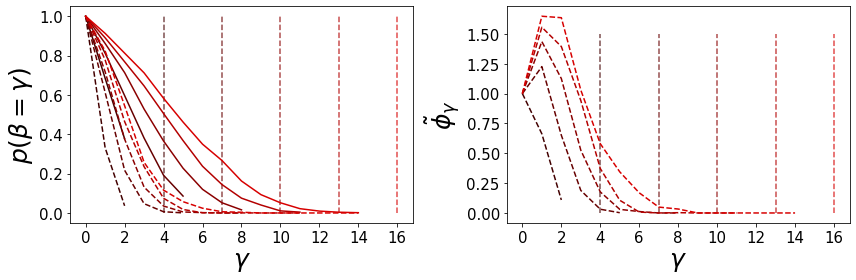

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(121)
for n in ns:
    c = cmap(float(n)/180)
    deh = list(map(lambda x: np.array(np.nanmean(pred_s[n][x])), list(range(1,mis_s[n]))))
    dehr = list(map(lambda x: np.array(np.nanmean(real_s[n][x])), list(range(1,mis_s[n]))))
    plt.plot(deh, color=c, label='pred'+str(n))
    plt.plot(dehr,'--', color=c, label='real'+str(n))
    plt.vlines(mis_s[n],0,1,color=c,linestyles='dashed',alpha=.7)
plt.ylabel(r'$p(\beta = \gamma)$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)
#plt.legend(loc=3,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
for n in ns:
    c = cmap(float(n)/180)
    deh = list(map(lambda x: np.array(x * np.nanmean(pred_s[n][x])), list(range(1,mis_s[n]))))
    dehr = list(map(lambda x: np.array(x * np.nanmean(real_s[n][x])), list(range(1,mis_s[n]))))
    plt.vlines(mis_s[n],0,1.5,color=c,linestyles='dashed',alpha=.7)
    plt.plot(dehr,'--', color=c, label='real'+str(n))
plt.ylabel(r'$\tilde{\phi}_\gamma$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim(0,12)
plt.tight_layout()
###plt.savefig('../../submission/nat-comm-submission/new-average-capacity-fixed-av-degree.pdf')

## fixed density

In [14]:
iterations = 15;
real_s = {}
pred_s = {}
mis_s = {}
rho = 0.2
ns = range(10,150,20)
for n in ns:
    now = time.time()
    real_s[n] = {}
    pred_s[n] = {}
    mis_s[n] = np.max([len(nx.maximal_independent_set(nx.erdos_renyi_graph(n,rho))) for i in range(10)]);
    for i in list(range(1,mis_s[n])):
        real_s[n][i] = []
        pred_s[n][i] = []
        for num_it in range(iterations):
            g = nx.erdos_renyi_graph(n,rho)
            k1  = np.mean(list(dict(g.degree()).values()))
            k2  = np.mean(np.array(list(dict(g.degree()).values()))**2)
            M = g.number_of_edges()
            real_s[n][i].append(np.mean(average_beta_sim_count(g,i,15000)))
            pred_s[n][i].append(average_beta_gamma(i,M, k1,k2))
    print(n, time.time() - now);

10 0.08483314514160156
30 10.514502763748169
50 20.411139249801636
70 26.36893081665039
90 36.72088408470154
110 45.166560888290405
130 54.731630086898804


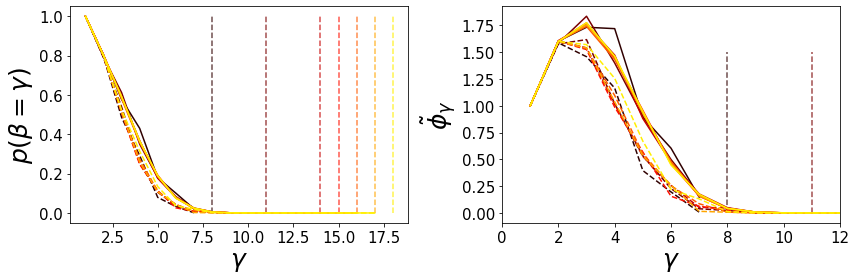

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
for n in ns:
    c = cmap(float(n)/180)
    deh = list(map(lambda x: np.array(np.nanmean(pred_s[n][x])), range(1, mis_s[n])))
    dehr = list(map(lambda x: np.array(
        np.nanmean(real_s[n][x])), range(1, mis_s[n])))
    plt.plot(list(range(1, mis_s[n])), deh, color=c, label='pred'+str(n))
    plt.plot(list(range(1, mis_s[n])), dehr, '--', color=c, label='real'+str(n))
    plt.vlines(mis_s[n], 0, 1, color=c, linestyles='dashed', alpha=.7)
plt.ylabel(r'$p(\beta = \gamma)$', fontsize=25)
plt.xlabel(r'$\gamma$', fontsize=25)
# plt.legend(loc=3,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
for n in ns:
    
    c = cmap(float(n)/180)
    deh = list(map(lambda x: np.array(
        x * np.nanmean(pred_s[n][x])), range(1, mis_s[n])))
    dehr = list(map(lambda x: np.array(
        x * np.nanmean(real_s[n][x])), range(1, mis_s[n])))
    
    plt.plot(list(range(1, mis_s[n])), deh, color=c, label='pred'+str(n))
    plt.vlines(mis_s[n], 0, 1.5, color=c, linestyles='dashed', alpha=.7)
    plt.plot(list(range(1, mis_s[n])), dehr, '--', color=c, label='real'+str(n))

plt.ylabel(r'$\tilde{\phi}_\gamma$', fontsize=25)
plt.xlabel(r'$\gamma$', fontsize=25)
# plt.legend(loc=3,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 12)
plt.tight_layout()
# plt.savefig('../../notes/nat-comm-submission/new-average-capacity-rho_'+str(rho)+'_.pdf')

## Fixed density in IG 

In [44]:
iterations = 30;
real_s = {}
real_s_tilde = {}
pred_s = {}
mis_s = {}
apred_s = {}
rho = 0.2
ns = [5, 8,10, 20, 40]
for n in ns:
    now = time.time()
    real_s[n] = {}
    pred_s[n] = {}
    apred_s[n] = {}
    real_s_tilde[n] = {}
    mis_s[n] = np.max([len(nx.maximal_independent_set(igt.interference_graph(igt.line_graph(
        igt.create_ER_bipartite_graph(n,rho))))) for i in range(10)]);
    for i in list(range(1,mis_s[n])):
        real_s[n][i] = []
        real_s_tilde[n][i] = []
        pred_s[n][i] = []
        apred_s[n][i] = []
        
        for num_it in range(iterations):
            g = nx.erdos_renyi_graph(n,rho)
            lg = igt.line_graph(g);
            igg = igt.interference_graph(lg)
            k1  = np.mean(list(dict(igg.degree()).values()))
            k2  = np.mean(np.array(list(dict(igg.degree()).values()))**2)
            M = igg.number_of_edges()
            real_s[n][i].append(np.mean(average_beta_sim_count(igg,i,5000)))
            real_s_tilde[n][i].append(np.mean(average_beta_sim_count_tilde(igg,i,5000)))
            pred_s[n][i].append(average_beta_gamma(i,M, k1,k2))
            apred_s[n][i].append(average_beta_gamma_value(i, M,k1))
    print(n, time.time() - now);

<ipython-input-17-566b19e3c04c>:13: RuntimeWarning: invalid value encountered in double_scalars
  ss = np.log(((zeta * Min / float(M))**float(gamma-beta)) * (1-zeta**2/float(M))**(beta*(beta-1)/float(2)));
<ipython-input-17-566b19e3c04c>:13: RuntimeWarning: invalid value encountered in log
  ss = np.log(((zeta * Min / float(M))**float(gamma-beta)) * (1-zeta**2/float(M))**(beta*(beta-1)/float(2)));
<ipython-input-17-566b19e3c04c>:13: RuntimeWarning: divide by zero encountered in log
  ss = np.log(((zeta * Min / float(M))**float(gamma-beta)) * (1-zeta**2/float(M))**(beta*(beta-1)/float(2)));


5 0.0308530330657959
8 0.11148285865783691
10 0.41826605796813965
20 12.392420291900635
40 168.3409140110016


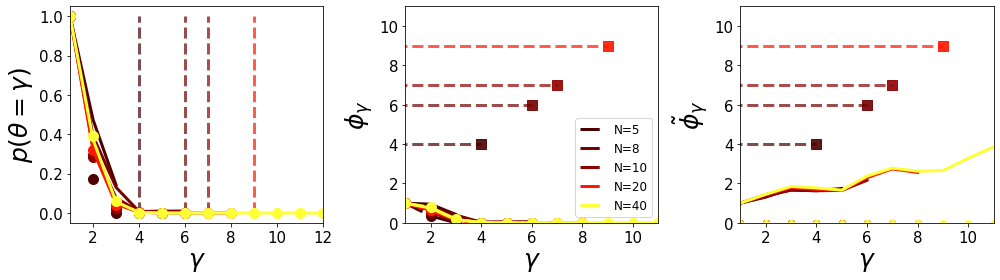

In [45]:
figure_data  = {}
plt.figure(figsize=(14,4))

plt.subplot(131)
for n in ns:
    c = cmap(float(n)/50)
    deh = list(map(lambda x: np.array(np.nanmean(pred_s[n][x])), list(range(1,mis_s[n]))))
    dehr = list(map(lambda x: np.array(np.nanmean(real_s[n][x])), list(range(1,mis_s[n]))))
    plt.plot(list(range(1,mis_s[n])),deh, color=c, label='pred'+str(n),linewidth=3)
    plt.plot(list(range(1,mis_s[n])),dehr,'o', color=c, label='real'+str(n),markersize=10)
    plt.vlines(mis_s[n],0,1,color=c,linestyles='dashed',alpha=.7,linewidth=3)
plt.ylabel(r'$p(\theta = \gamma)$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)
plt.xlim(1,12)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.box('off')

plt.subplot(132)
for n in ns:
    c = cmap(float(n)/50)
    deh = list(map(lambda x: np.array(float(x) * np.nanmean(pred_s[n][x])), list(range(1,mis_s[n]))))
    dehr = list(map(lambda x: np.array(float(x) * np.nanmean(real_s[n][x])), list(range(1,mis_s[n]))))
    plt.plot(list(range(1,mis_s[n])),deh, color=c,linewidth=3)# label='pred'+str(n))
    plt.plot(list(range(1,mis_s[n])),dehr,'o', color=c,markersize=10)
    plt.hlines(mis_s[n],0,mis_s[n],color=c,linestyles='dashed',alpha=.7,linewidth=3)
    plt.plot(mis_s[n],mis_s[n],'s',color=c,markersize=10,alpha=.9)
    plt.plot(list(range(1,mis_s[n])),dehr,'-.', color=c, label='N='+str(n), linewidth=3)
plt.ylabel(r'$\phi_\gamma$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)    

plt.xlabel(r'$\gamma$',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.box('off')
plt.xlim(1,11)
plt.ylim(0,11)
plt.legend(loc=4,fontsize=12)

plt.subplot(133)
for n in ns:
    c = cmap(float(n)/50)
    adeh = list(map(lambda x: np.array(np.nanmean(apred_s[n][x])), list(range(1,mis_s[n]))))
    dehr = list(map(lambda x: np.array(np.nanmean(real_s_tilde[n][x])), list(range(1,mis_s[n]))))
    plt.plot(list(range(1,mis_s[n])),adeh, color=c, label='N='+str(n), linewidth=3)
    plt.plot(list(range(1,mis_s[n])),dehr,'o', color=c, label='real'+str(n))
    plt.hlines(mis_s[n],0,mis_s[n],color=c,linestyles='dashed',alpha=.7,linewidth=3)
    plt.plot(mis_s[n],mis_s[n],'s',color=c,markersize=10,alpha=.9)
    
plt.ylabel(r'$\tilde{\phi}_\gamma$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)    

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1,11)
plt.ylim(0,11)
plt.box('off')

plt.tight_layout()

In [46]:
fig3 = {}
fig3 = {'fig3a': [mis_s[n], pred_s, real_s],
        'fig3b': [mis_s[n], pred_s, real_s],
        'fig3c': [mis_s[n], apred_s, real_s_tilde]}

In [47]:
import pickle as pk
pk.dump(fig3, open('./figure_data/figure3.pck', 'wb'))

## variable density and  fixed size

In [48]:
iterations = 10;
real_v = {}
pred_v = {}
apred_v = {}
mis_v = {}
rhos = np.linspace(0.1,.7,5)
n = 50
for rho in rhos:
    now = time.time()
    real_v[rho] = {}
    pred_v[rho] = {}
    apred_v[rho] = {}
    mis_v[rho] = np.max([len(nx.maximal_independent_set(nx.erdos_renyi_graph(n,rho))) for i in range(10)]);
    print('starting mis loop')
    for i in range(1,mis_v[rho]):
        print('gamma = ', i )
        real_v[rho][i] = []
        pred_v[rho][i] = []
        apred_v[rho][i] = []
        for num_it in range(iterations):
            g = nx.erdos_renyi_graph(n,rho)
            k1  = np.mean(list(dict(g.degree()).values()))
            k2  = np.mean(np.array(list(dict(g.degree()).values()))**2)
            M = g.number_of_edges()
            real_v[rho][i].append(np.mean(average_beta_sim_count(g,i,5000)))
            pred_v[rho][i].append(average_beta_gamma(i,M, k1,k2))
            apred_v[rho][i].append(average_beta_gamma_value(i,M,k1))
    print(rho, time.time() - now)

starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
gamma =  5
gamma =  6
gamma =  7
gamma =  8
gamma =  9
gamma =  10
gamma =  11
gamma =  12
gamma =  13
gamma =  14
gamma =  15
gamma =  16
gamma =  17
gamma =  18
gamma =  19
gamma =  20
gamma =  21
0.1 9.120556831359863
starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
gamma =  5
gamma =  6
gamma =  7
gamma =  8
gamma =  9
gamma =  10
gamma =  11
0.25 3.6749000549316406
starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
gamma =  5
gamma =  6
gamma =  7
0.4 2.0201339721679688
starting mis loop
gamma =  1
gamma =  2
gamma =  3


<ipython-input-17-566b19e3c04c>:13: RuntimeWarning: invalid value encountered in log
  ss = np.log(((zeta * Min / float(M))**float(gamma-beta)) * (1-zeta**2/float(M))**(beta*(beta-1)/float(2)));


gamma =  4
gamma =  5
0.5499999999999999 1.1886122226715088
starting mis loop
gamma =  1
gamma =  2
gamma =  3
gamma =  4
0.7 0.9163870811462402


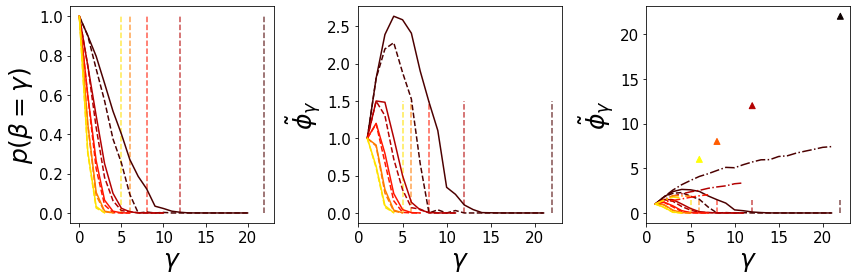

In [49]:
plt.figure(figsize=(12,4))

plt.subplot(131)
for n in rhos:
    c = cmap(float(n))
    deh = list(map(lambda x: np.array(np.nanmean(pred_v[n][x])), range(1,mis_v[n])))
    dehr = list(map(lambda x: np.array(np.nanmean(real_v[n][x])), range(1,mis_v[n])))
    plt.plot(deh, color=c, label='pred'+str(n))
    plt.plot(dehr,'--', color=c, label='real'+str(n))
    plt.vlines(mis_v[n],0,1,color=c,linestyles='dashed',alpha=.7)
plt.ylabel(r'$p(\beta = \gamma)$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)
#plt.legend(loc=3,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.subplot(132)
for n in rhos:
    c = cmap(float(n))
    deh = list(map(lambda x: np.array(x * np.nanmean(pred_v[n][x])), range(1,mis_v[n])))
    dehr = list(map(lambda x: np.array(x * np.nanmean(real_v[n][x])), range(1,mis_v[n])))
    plt.plot(range(1,mis_v[n]), deh, color=c, label='pred'+str(n))
    plt.vlines(mis_v[n],0,1.5,color=c,linestyles='dashed',alpha=.7)
    plt.plot(range(1,mis_v[n]),dehr,'--', color=c, label='real'+str(n))
plt.ylabel(r'$\tilde{\phi}_\gamma$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)
#plt.legend(loc=3,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(133)
for n in rhos:
    c = cmap(float(n))
    deh = list(map(lambda x: np.array(x * np.nanmean(pred_v[n][x])), range(1,mis_v[n])))
    dehr = list(map(lambda x: np.array(x * np.nanmean(real_v[n][x])), range(1,mis_v[n])))
    plt.plot(range(1,mis_v[n]), deh, color=c, label='pred'+str(n))
    adeh = list(map(lambda x: np.array(np.nanmean(apred_v[n][x])), range(1,mis_v[n])))
    plt.plot(range(1,mis_v[n]),adeh, '-.', color=c, label='apred'+str(n))
    plt.vlines(mis_v[n],0,1.5,color=c,linestyles='dashed',alpha=.7)
#    plt.plot(mis_v[n],mis_v[n],'^',color=c)
    plt.plot(range(1,mis_v[n]),dehr,'--', color=c, label='real'+str(n))
plt.scatter(list(map(lambda x: mis_v[x], rhos)),list(map(lambda x: mis_v[x], rhos)),c=rhos,marker='^',cmap=cmap)
plt.ylabel(r'$\tilde{\phi}_\gamma$', fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)
#plt.legend(loc=3,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(loc=0)
plt.tight_layout()

